# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [21]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna()
print df.head()

df.columns = ["admit", "gre", "gpa", "prestige"]
print df.columns

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


### What are the predictors and dependent variable ?

In [22]:
# My dependent variable is admit and my predictors are GRE, GPA and PRESTIGE 

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

In [23]:
# My goal is to identify the various factors that may influence admission into graduate school.

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

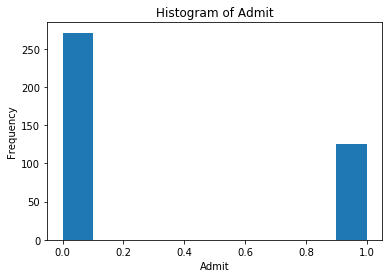

In [24]:
df.admit.plot(kind = "hist" , title = "Histogram of Admit")
plt.xlabel("Admit")
plt.ylabel("Frequency")

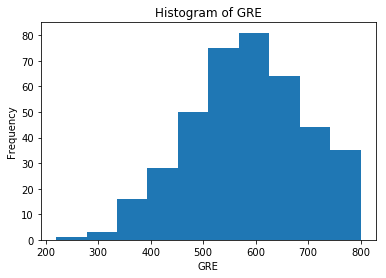

In [25]:
df.gre.plot(kind = "hist" , title = "Histogram of GRE")
plt.xlabel("GRE")
plt.ylabel("Frequency")

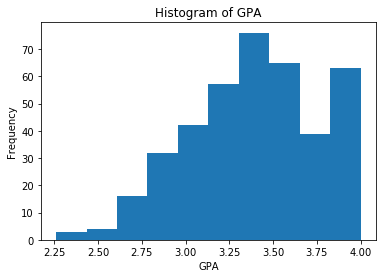

In [26]:
df.gpa.plot(kind = "hist" , title = "Histogram of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")

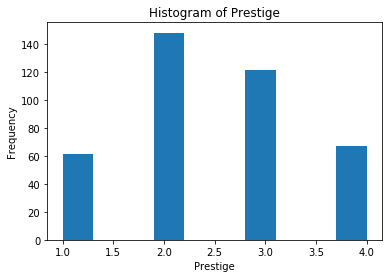

In [27]:
df.prestige.plot(kind = "hist" , title = "Histogram of Prestige")
plt.xlabel("Prestige")
plt.ylabel("Frequency")

### FInd the correlation of each feature with admission

In [28]:
print df.corr()

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


### How do you deal with the prestige feature?

In [29]:
# create dummy variables

dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [30]:
cols_to_keep = ['admit', 'gre', 'gpa']

data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [34]:
X = data.loc[:, "gre":]
y = data.admit

In [37]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.80487805  0.6         0.725       0.675       0.725       0.675
  0.71794872  0.66666667  0.71794872  0.64102564]


In [38]:
print(scores.mean())

0.694846779237


### What is the most important feature that contributes to the students probability of admission? 

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model